<a href="https://colab.research.google.com/github/Hiteshjr24/week_2_assignment/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import cv2
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!pip install  kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiteshjr24","key":"6673e591d3e59a84258bb48cfc240b68"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 92% 124M/134M [00:01<00:00, 57.9MB/s]
100% 134M/134M [00:01<00:00, 79.8MB/s]


In [8]:
 ! unzip multiclass-weather-dataset.zip -d dataset

Archive:  multiclass-weather-dataset.zip
  inflating: dataset/dataset/alien_test/Cloud_1.png  
  inflating: dataset/dataset/alien_test/Cloud_2.jpg  
  inflating: dataset/dataset/alien_test/Cloud_3.jpeg  
  inflating: dataset/dataset/alien_test/Cloud_4.jpg  
  inflating: dataset/dataset/alien_test/foggy_1.jpg  
  inflating: dataset/dataset/alien_test/foggy_10.jpg  
  inflating: dataset/dataset/alien_test/foggy_2.jpg  
  inflating: dataset/dataset/alien_test/foggy_3.jpg  
  inflating: dataset/dataset/alien_test/foggy_4.jpg  
  inflating: dataset/dataset/alien_test/foggy_5.jpg  
  inflating: dataset/dataset/alien_test/foggy_6.jpg  
  inflating: dataset/dataset/alien_test/foggy_7.jpg  
  inflating: dataset/dataset/alien_test/foggy_8.jpg  
  inflating: dataset/dataset/alien_test/foggy_9.jpg  
  inflating: dataset/dataset/alien_test/rain_1.jpg  
  inflating: dataset/dataset/alien_test/rain_2.png  
  inflating: dataset/dataset/alien_test/rain_3.jpg  
  inflating: dataset/dataset/alien_test/ra

In [9]:
foggy = "/content/dataset/dataset/foggy"
sunrise = "/content/dataset/dataset/sunrise"
shine = "/content/dataset/dataset/shine"
rainy = "/content/dataset/dataset/rainy"
cloudy = "/content/dataset/dataset/cloudy"
test = "/content/dataset/dataset/alien_test"

In [10]:
import os
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(150,150))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [11]:
x,y= create_dataset(foggy,"foggy")
x,y= create_dataset(sunrise,"sunrise")
x,y= create_dataset(shine,"shine")
x,y= create_dataset(rainy,"rainy")
x,y= create_dataset(cloudy,"cloudy")

100%|██████████| 300/300 [00:00<00:00, 407.20it/s]


In [12]:
x =  np.array(x)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
img_size =150

x_train = np.array(x_train)/255.0
x_test = np.array(x_test)/255.0


x_train = x_train.reshape(-1,img_size,img_size,3)
y_train = np.array(y_train)

x_test = x_test.reshape(-1,img_size,img_size,3)
y_test = np.array(y_test)

In [15]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train_lb = lb.fit_transform(y_train)
y_test_lb = lb.fit_transform(y_test)

In [16]:
model = tf.keras.models.Sequential()

In [17]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics="accuracy")

In [19]:
batch_size=32
history =  model.fit(x_train,y_train_lb,epochs=20,validation_data=(x_test,y_test_lb),
                     batch_size=32 ,verbose=1)

Epoch 1/20
38/38 [==============================] - 35s 55ms/step - loss: 1.3851 - accuracy: 0.3938 - val_loss: 0.8847 - val_accuracy: 0.6067
Epoch 2/20
38/38 [==============================] - 1s 31ms/step - loss: 0.8605 - accuracy: 0.6654 - val_loss: 0.8356 - val_accuracy: 0.6300
Epoch 3/20
38/38 [==============================] - 1s 31ms/step - loss: 0.8370 - accuracy: 0.6508 - val_loss: 0.6926 - val_accuracy: 0.7233
Epoch 4/20
38/38 [==============================] - 1s 31ms/step - loss: 0.6935 - accuracy: 0.7145 - val_loss: 0.6627 - val_accuracy: 0.7033
Epoch 5/20
38/38 [==============================] - 1s 31ms/step - loss: 0.6257 - accuracy: 0.7335 - val_loss: 0.7777 - val_accuracy: 0.6800
Epoch 6/20
38/38 [==============================] - 1s 31ms/step - loss: 0.7184 - accuracy: 0.7084 - val_loss: 0.8040 - val_accuracy: 0.6400
Epoch 7/20
38/38 [==============================] - 1s 30ms/step - loss: 0.7286 - accuracy: 0.7022 - val_loss: 0.5865 - val_accuracy: 0.7600
Epoch 8/20
3

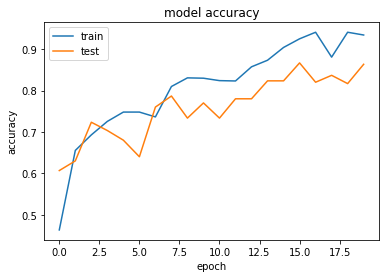

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

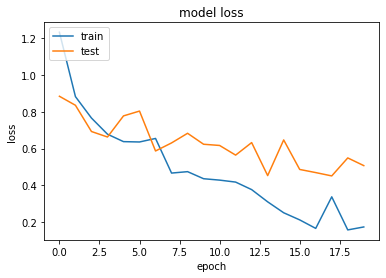

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()